# Trabalho Final de INF 420 - Departamento de Ciência da Computação

Paula Teresa Mota Gibrim - Matrícula: ES90366
José Antônio L. Paiva Júnior - Matrícula: 111322

In [1]:
path = 'images/single_rules/rules_random_initial_states'

## Convolutional Neural Network (CNN)

### Import TensorFlow

In [2]:
import tensorflow as tf
import keras
from keras import models
from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization, LeakyReLU
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.models import model_from_json
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split

### Load dataset

In [3]:
# Vetores para cada classe
classI = [0, 8, 32, 40, 128, 136, 160, 168, 255, 64, 239, 253, 251, 96, 235, 249, 254, 192, 238,252, 250, 224, 234, 248]
classII = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 19, 23, 24, 25, 26, 27, 28, 29, 33, 34,127, 16, 191, 247, 17, 63, 119, 223, 95, 20, 159, 215, 21, 31, 87, 65, 111, 125, 80, 175,245, 47, 81, 117, 68, 207, 221, 69, 79, 93, 84, 143, 213, 85, 55, 66, 189, 231, 61, 67,103, 82, 167, 181, 39, 53, 83, 70, 157, 199, 71, 123, 48, 187, 243, 35, 49, 59, 115, 36,219, 37, 91, 38, 52, 155, 211, 42, 112, 171, 241, 43, 113, 44, 100, 203, 217, 46, 116, 139,209, 50, 179, 51, 56, 98, 185, 227, 57, 99, 58, 114, 163, 177, 62, 118, 131, 145, 72, 237,73, 109, 74, 88, 173, 229, 76, 205, 77, 78, 92, 141, 197, 94, 133, 104, 233, 108, 201, 130,144, 190, 246, 132, 222, 134, 148, 158, 214, 138, 174, 208, 140, 196, 206, 220, 142, 244,212, 152, 188, 194, 230, 154, 166, 180, 210, 156, 198, 162, 176, 186, 242, 164, 218, 170,240, 172, 202, 216, 228, 178, 184, 226, 200, 236, 204, 232]
classIII = [18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150, 183, 151, 86, 135, 149, 75, 89, 101,102, 153, 195, 165, 161, 129, 182]
classIV = [41, 54, 106, 110, 97, 107, 121, 147, 120, 169, 225, 124, 137, 193]

def genTrain(imgPath):
  print(imgPath)
  for i in classI:
    img = Image.open(imgPath + "classI/Rule" + str(i) + ".png")
    imgArr = np.expand_dims(np.asarray(img)/255., axis=-1)
    x.append(imgArr)
    y.append(1)
  print("classI - ok")

  for i in classII:
    img = Image.open(imgPath + "classII/Rule" + str(i) + ".png")
    imgArr = np.expand_dims(np.asarray(img)/255., axis=-1)
    x.append(imgArr)
    y.append(2)
  print("classII - ok")

  for i in classIII:
    img = Image.open(imgPath + "classIII/Rule" + str(i) + ".png")
    imgArr = np.expand_dims(np.asarray(img)/255., axis=-1)
    x.append(imgArr)
    y.append(0)
  print("classIII - ok")

  for i in classIV:
    img = Image.open(imgPath + "classIV/Rule" + str(i) + ".png")
    imgArr = np.expand_dims(np.asarray(img)/255., axis=-1)
    x.append(imgArr)
    y.append(0)
  print("classIV - ok")

(75, 150, 1)


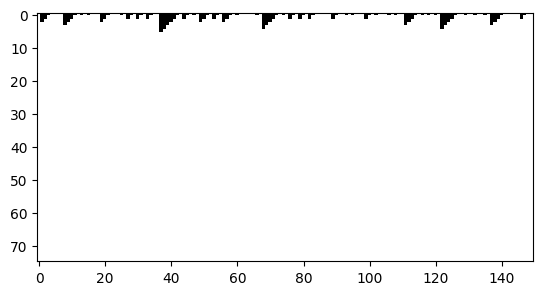

In [4]:
comp = 1
imgPath = path + str(comp) + "/"

img = Image.open(imgPath + "classI/Rule" + str(136) + ".png")
imgArr = np.expand_dims(np.asarray(img)/255., axis=-1)
print(imgArr.shape)
plt.imshow(imgArr, cmap='gray')
plt.show()

In [5]:
x = []
y = []

for i in range(0,101):
    imgPath = path + str(i) + "/"
    genTrain(imgPath)

x = np.asarray(x, dtype=np.float32)
y = np.asarray(y, dtype=np.float32)

../UFV_WolframRules_Imgs/images/single_rules/rules_random_initial_states0/
classI - ok
classII - ok
classIII - ok
classIV - ok
../UFV_WolframRules_Imgs/images/single_rules/rules_random_initial_states1/
classI - ok
classII - ok
classIII - ok
classIV - ok
../UFV_WolframRules_Imgs/images/single_rules/rules_random_initial_states2/
classI - ok
classII - ok
classIII - ok
classIV - ok
../UFV_WolframRules_Imgs/images/single_rules/rules_random_initial_states3/
classI - ok
classII - ok
classIII - ok
classIV - ok
../UFV_WolframRules_Imgs/images/single_rules/rules_random_initial_states4/
classI - ok
classII - ok
classIII - ok
classIV - ok
../UFV_WolframRules_Imgs/images/single_rules/rules_random_initial_states5/
classI - ok
classII - ok
classIII - ok
classIV - ok
../UFV_WolframRules_Imgs/images/single_rules/rules_random_initial_states6/
classI - ok
classII - ok
classIII - ok
classIV - ok
../UFV_WolframRules_Imgs/images/single_rules/rules_random_initial_states7/
classI - ok
classII - ok
classIII - 

0.0


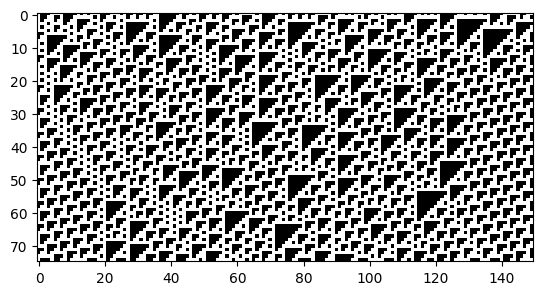

In [6]:
print(y[510])
plt.imshow(x[510], cmap='gray')
plt.show()

In [7]:
train_images, test_images, train_labels, test_labels = train_test_split(x, y, test_size=0.25)

train_labels = keras.utils.np_utils.to_categorical(train_labels)
test_labels = keras.utils.np_utils.to_categorical(test_labels)

2 [0. 0. 1.]


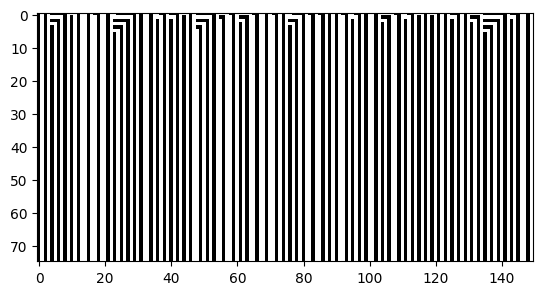

In [8]:
print(np.argmax(test_labels[50]),test_labels[50])
plt.imshow(test_images[50], cmap='gray')
plt.show()

### Create the CNN

In [9]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3),  padding='same', input_shape=(75, 150, 1)))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(MaxPooling2D((1, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same' ))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(AveragePooling2D((3,3)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), padding='same' ))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(AveragePooling2D((5,5)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3) ))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(AveragePooling2D((3,3)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.05))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 150, 32)       320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 75, 150, 32)       0         
                                                                 
 batch_normalization (BatchN  (None, 75, 150, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        1

### Compile and train the model

In [10]:
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, batch_size=64,
                    validation_data=(test_images, test_labels))


# Avaliacao final do modelo
scores = model.evaluate(test_images,  test_labels, verbose=0)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

Epoch 1/30
303/303 [==============================] - 23s 55ms/step - loss: 0.6340 - accuracy: 0.7974 - val_loss: 4.2682 - val_accuracy: 0.0942
Epoch 2/30
303/303 [==============================] - 16s 54ms/step - loss: 0.1635 - accuracy: 0.9609 - val_loss: 3.3184 - val_accuracy: 0.5859
Epoch 3/30
303/303 [==============================] - 17s 55ms/step - loss: 0.0858 - accuracy: 0.9817 - val_loss: 0.1502 - val_accuracy: 0.9598
Epoch 4/30
303/303 [==============================] - 17s 55ms/step - loss: 0.0582 - accuracy: 0.9877 - val_loss: 0.0608 - val_accuracy: 0.9886
Epoch 5/30
303/303 [==============================] - 17s 56ms/step - loss: 0.0534 - accuracy: 0.9882 - val_loss: 0.0533 - val_accuracy: 0.9912
Epoch 6/30
303/303 [==============================] - 17s 55ms/step - loss: 0.0437 - accuracy: 0.9905 - val_loss: 0.0232 - val_accuracy: 0.9958
Epoch 7/30
303/303 [==============================] - 17s 55ms/step - loss: 0.0374 - accuracy: 0.9906 - val_loss: 0.0386 - val_accuracy:

### Evaluate the model

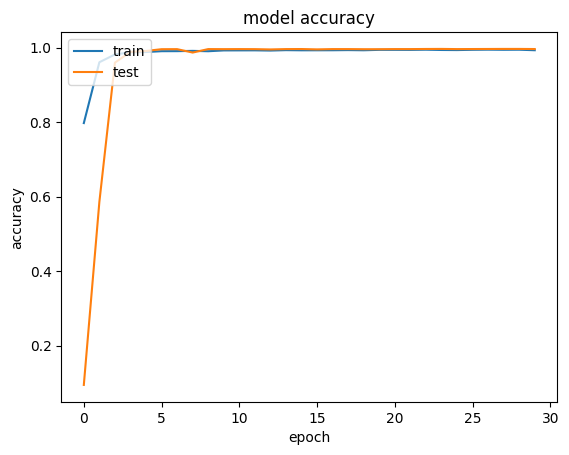

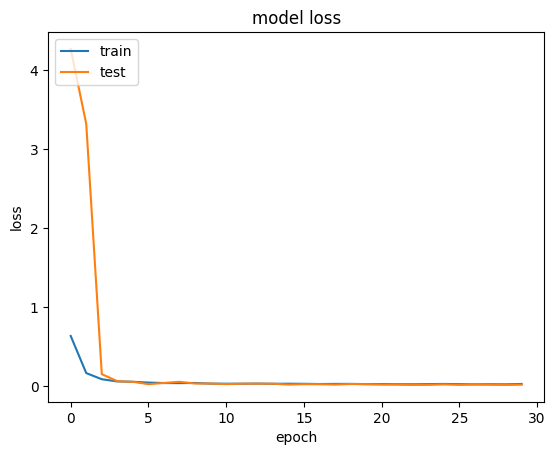

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### Save the model

In [12]:
model.save("model", overwrite=True, save_format="keras")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


### Load and use model

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


# Vetores para cada classe
classI = [0, 8, 32, 40, 128, 136, 160, 168, 255, 64, 239, 253, 251, 96, 235, 249, 254, 192, 238,252, 250, 224, 234, 248]
classII = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 19, 23, 24, 25, 26, 27, 28, 29, 33, 34,127, 16, 191, 247, 17, 63, 119, 223, 95, 20, 159, 215, 21, 31, 87, 65, 111, 125, 80, 175,245, 47, 81, 117, 68, 207, 221, 69, 79, 93, 84, 143, 213, 85, 55, 66, 189, 231, 61, 67,103, 82, 167, 181, 39, 53, 83, 70, 157, 199, 71, 123, 48, 187, 243, 35, 49, 59, 115, 36,219, 37, 91, 38, 52, 155, 211, 42, 112, 171, 241, 43, 113, 44, 100, 203, 217, 46, 116, 139,209, 50, 179, 51, 56, 98, 185, 227, 57, 99, 58, 114, 163, 177, 62, 118, 131, 145, 72, 237,73, 109, 74, 88, 173, 229, 76, 205, 77, 78, 92, 141, 197, 94, 133, 104, 233, 108, 201, 130,144, 190, 246, 132, 222, 134, 148, 158, 214, 138, 174, 208, 140, 196, 206, 220, 142, 244,212, 152, 188, 194, 230, 154, 166, 180, 210, 156, 198, 162, 176, 186, 242, 164, 218, 170,240, 172, 202, 216, 228, 178, 184, 226, 200, 236, 204, 232]
classIII = [18, 22, 30, 45, 60, 90, 105, 122, 126, 146, 150, 183, 151, 86, 135, 149, 75, 89, 101,102, 153, 195, 165, 161, 129, 182]
classIV = [41, 54, 106, 110, 97, 107, 121, 147, 120, 169, 225, 124, 137, 193]


In [2]:
loaded_model = tf.keras.models.load_model("model")

### Apurando resultados

In [ ]:
scores = loaded_model.evaluate(test_images,  test_labels, verbose=0)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

(75, 150, 1)
(1, 75, 150, 1)


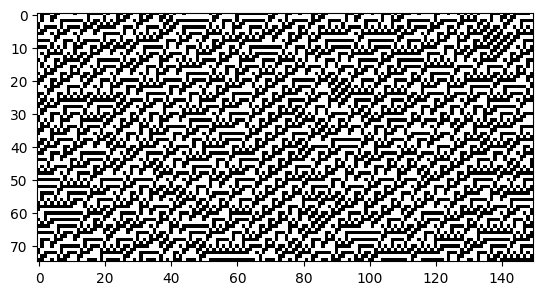

1/1 [==============================] - 0s 59ms/step
Saída da rede:  [[9.999999e-01 1.302270e-07 5.385519e-19]]
Classe predita:  0


In [22]:
n_comp = 1
path = "../images/compositions/composition/"
imgPath = path + "I+III/"

n1 = 40
n2 = 45

img = Image.open(imgPath + "Rule" + str(n1) +" + Rule" + str(n2) +".png")
imgArr = np.expand_dims(np.asarray(img)/255., axis=-1)
print(imgArr.shape)
imgArr_pred = imgArr[None,:,:,:]
print(imgArr_pred.shape)
plt.imshow(imgArr, cmap='gray')
plt.show()

label_ped = model.predict(imgArr_pred)

print("Saída da rede: ",label_ped)
print("Classe predita: ",np.argmax(label_ped)) #0 significa (3 ou 4)